In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
# Step 2

# Question 1 - How to read
img = cv2.imread('Frame0064.png')
cv2.imshow('First Image', img)
cv2.waitKey(2000)

-1

In [3]:
# Question 2 - 
Ig = cv2.imread('Frame0064.png', 0)
cv2.imshow('First Image - Grayscale', Ig)
cv2.waitKey(2000)


-1

In [4]:
vid1 = cv2.VideoCapture('Masks.mp4')
while vid1.isOpened():
    rt, frm = vid1.read()
    cv2.imshow('Frame', frm)
    cv2.waitKey(2)
    
vid1.release()
vid1.destroyAllWindows()

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:1000: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [5]:
vid1 = cv2.VideoCapture('Vid.mp4')
while vid1.isOpened():
    rt, frm = vid1.read()
    cv2.imshow('Frame', frm)
    cv2.waitKey(2)
    
vid1.release()
vid1.destroyAllWindows()

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:1000: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [6]:
Ig = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Image - Grayscale", Ig)
cv2.waitKey(2000)

-1

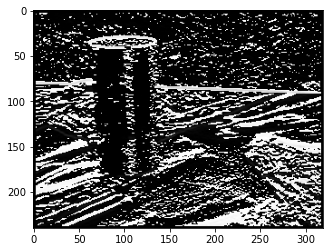

In [7]:
# For the vertical edges

vert_filter = [[-1, -2, -1], [0,0,0], [1, 2, 1]]
hori_filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

n, m, d = img.shape

vert_edges = np.zeros_like(img)

for row in range (3, n - 2):
    for col in range (3, m - 2):
        pix = img[row - 1: row + 2, col - 1: col + 2, 0]
        trans_pix = vert_filter * pix
        
        vert_score = (trans_pix.sum() + 4) / 10
        vert_edges[row, col] = [vert_score] * 3
        
plt.imshow(vert_edges)


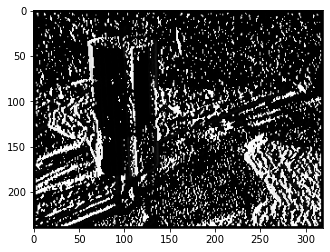

In [8]:
# For the horizontal edges

k_x = np.zeros_like(img)

for row in range (3, n - 2):
    for col in range (3, m - 2):
        pix = img[row - 1: row + 2, col - 1: col + 2, 0]
        trans_pix = hori_filter * pix
        
        hori_score = (trans_pix.sum() + 4) / 10
        k_x[row, col] = [hori_score] * 3

plt.imshow(k_x)

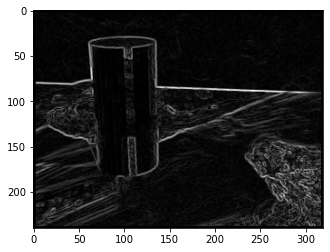

In [9]:
edges = np.zeros_like(img)

for row in range (3, n - 2):
    for col in range (3, m - 2):
        pix = img[row - 1: row + 2, col - 1: col + 2, 0]
        vert_trans_pix = vert_filter * pix
        vert_score = vert_trans_pix.sum()/ 5
        
        hori_trans_pix = hori_filter * pix
        hori_score = hori_trans_pix.sum()/5
        
        edge_score = ((vert_score ** 2) + (hori_score ** 2)) ** 0.5
        edges[row, col] = [edge_score] * 3

edges = edges / edges.max()
plt.imshow(edges)


In [10]:
kx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
ky = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
x_edge = cv2.filter2D(Ig, cv2.CV_8U, kx)
y_edge = cv2.filter2D(Ig, cv2.CV_8U, ky)

cv2.imshow("X Gradient", x_edge)
cv2.imshow("Y Gradient", y_edge)
cv2.waitKey(2000)

-1

In [11]:
gx = cv2.filter2D(Ig, -1, kx)
cv2.imshow("X magnitude", gx)
cv2.waitKey(2000)

gy = cv2.filter2D(Ig, -1, ky)
cv2.imshow("Y Magnitude", gy)
cv2.waitKey(2000)

-1

In [12]:
addition = np.add(np.square(kx), np.square(ky))
xyGrad = np.sqrt(addition)
gxy = cv2.filter2D(Ig, -1, xyGrad)
cv2.imshow("Total magnitude", gxy)
cv2.waitKey(2000)

-1

In [13]:
# Step 3

# Question 1
rgbImg = cv2.imread('Frame0064.png')
cv2.imshow("RGB Image", rgbImg)

b, g, r = cv2.split(rgbImg)
cv2.imshow("Red channel", r)
cv2.imshow("Green channel", g)
cv2.imshow("Blue channel", b)
cv2.waitKey(2000)

-1

In [14]:
# Question 2
hsvImg = cv2.cvtColor(rgbImg, cv2.COLOR_RGB2HSV)
cv2.imshow("HSV Image", hsvImg)
cv2.waitKey(2000)

-1

In [15]:
# Step 4

# Question 1
vid = cv2.VideoCapture('Vid.mp4')

width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
write = cv2.VideoWriter('SimpleColorThresholder.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))

while vid.isOpened():
    _, frame = vid.read()
    
    hsvFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    minOrange = np.array([5, 45, 45], np.uint8)
    maxOrange = np.array([15, 255, 255], np.uint8)
    
    mask = cv2.inRange(hsvFrame, minOrange, maxOrange)
    write.write(mask)
    frame = mask
    
    cv2.imshow('Edge detection - color', mask)
    cv2.waitKey(3)
    
write.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [16]:
vid1 = cv2.VideoCapture('Vid.mp4')

width1 = int(vid1.get(cv2.CAP_PROP_FRAME_WIDTH))
height1 = int(vid1.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter('betterColorDetection.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))

while vid1.isOpened():
    _, frame = vid1.read()
    hsvFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2HLS)
    
    minOrange = np.array([1, 20, 45], np.uint8)
    maxOrange = np.array([15, 255, 255], np.uint8)
    
    mask = cv2.inRange(hsvFrame, minOrange, maxOrange)
    writer.write(mask)
    frame = mask
    
    cv2.imshow('Better edge detection - color', mask)
    cv2.waitKey(3)
    
writer.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [17]:
# Question 4

vid = cv2.VideoCapture('Vid.mp4')
numFrames = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
write = cv2.VideoWriter('GaussianColorThresholder.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))

while vid.isOpened():
    _, frame = vid.read()
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    minOrange = np.array([100, 85, 2], np.uint8)
    maxOrange = np.array([255, 184, 88], np.uint8)
    
    mask = cv2.inRange(rgb, minOrange, maxOrange)
    
    c = np.cov(mask)
    b = np.mean(mask)
    
    ht = mask[0]
    wd = mask[1]
    
    for x in ht:
        for y in wd:
            if (mask[x][y] == 255):
                p1 = np.sqrt(2 * np.pi * np.linalg.det(c))
                p2 = np.exp(-1/2 * np.transpose(mask[x][y] - b).matmul(np.linalg.inv(c)))
                p3 = mask[x][y] - b
                a = 1/p1 * p2 * p3
                write.write(a)
            else:
                mask[x][y] = 0
                write.write(mask)
    cv2.waitKey(2)
    cv2.imshow('Gaussian Color Detection', mask)
    
write.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
